# Generic N-D sweeps

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import lightlab.util.sweep as sUtil

In [2]:
# Turn this on when executing interactively
livePlots = False

In [3]:
class Plant():
    def __init__(self):
        self.x = 2
        self.y = 2
        
    def actuateX(self, newX, rounded=False):
        self.x = round(newX) if rounded else newX
        
    def actuateY(self, newY):
        self.y = newY
        
    def measure(self):
        return (np.sin(self.x * self.y/3), self.y / self.x)

## Simplest case

Generic sweep in xAct
Dim-0...
1/20...
2/20...
3/20...
4/20...
5/20...
6/20...
7/20...
8/20...
9/20...
10/20...
11/20...
12/20...
13/20...
14/20...
15/20...
16/20...
17/20...
18/20...
19/20...
20/20...
Sweep completed!


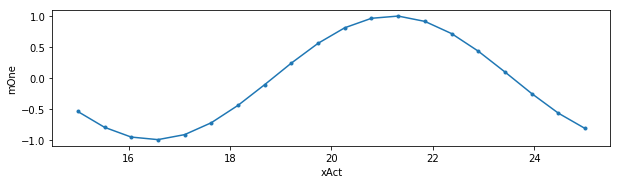

In [4]:
p = Plant()

swpInX = sUtil.NdSweeper()
swpInX.addActuation('xAct', lambda x: p.actuateX(x, rounded=False), np.linspace(15, 25, 20))
swpInX.addMeasurement('mOne', lambda: p.measure()[0])
swpInX.setMonitorOptions(stdoutPrint=not livePlots, livePlot=livePlots)

swpInX.gather()
if not livePlots:
    swpInX.plot()

## Multiple measurements and a domain parser

Generic sweep in xAct
Dim-0...
1/20...
2/20...
3/20...
4/20...
5/20...
6/20...
7/20...
8/20...
9/20...
10/20...
11/20...
12/20...
13/20...
14/20...
15/20...
16/20...
17/20...
18/20...
19/20...
20/20...
Sweep completed!


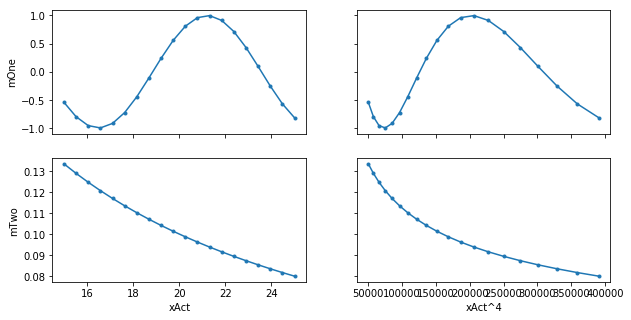

In [5]:
swpInX.addMeasurement('mTwo', lambda: p.measure()[1])
swpInX.addParser('xAct^4', lambda d: d['xAct']**4) # Non actuated x-axis
swpInX.setPlotOptions(xKey=('xAct', 'xAct^4'))
swpInX.setMonitorOptions(stdoutPrint=not livePlots, livePlot=livePlots)
swpInX.gather()
if not livePlots:
    swpInX.plot()

### Adding new parsers after the data has been gathered

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95fb3a9b00>]],
      dtype=object)

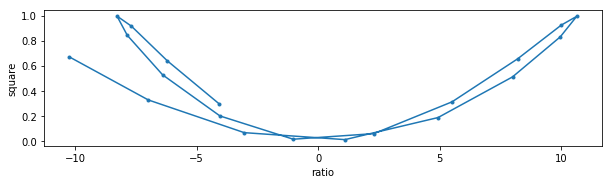

In [6]:
swpInX.addParser('ratio', lambda d: d['mOne'] / d['mTwo'])
swpInX.addParser('square', lambda d: d['mOne'] * d['mOne'])
swpInX.setPlotOptions(xKey=('ratio',), yKey='square')
swpInX.plot()

## Subsuming to 2D and progress server

In [7]:
swpInY = sUtil.NdSweeper()
swpInY.addActuation('yAct', p.actuateY, np.linspace(1, 2, 15))

fullSwp = swpInX.subsume(swpInY)

fullSwp.addParser('norm', lambda x: (x['mOne'] + x['xAct'])**2)
fullSwp.setMonitorOptions(runServer=True, livePlot=livePlots, plotEvery=10, stdoutPrint=False)
fullSwp.setPlotOptions(xKey=('yAct'), yKey=('norm', 'ratio'))
fullSwp.gather()

See sweep progress online at
http://lightwave-lab-cassander.ee.princeton.edu:null


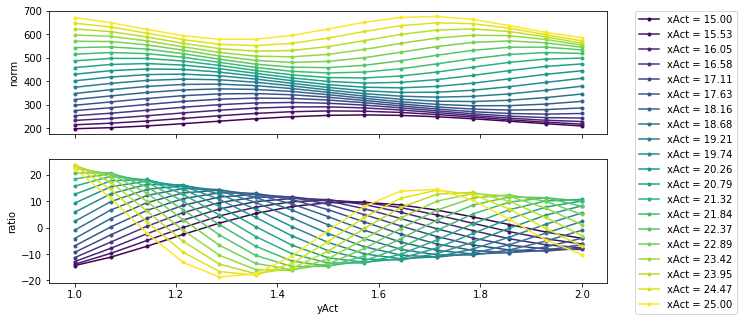

In [8]:
fullSwp.setPlotOptions(plType='curves')
_=fullSwp.plot()

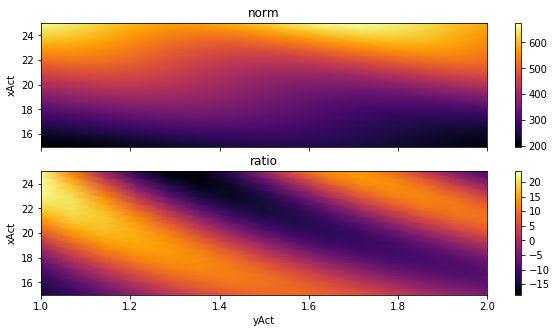

In [9]:
fullSwp.setPlotOptions(plType='surf')
_=fullSwp.plot()

## Using static data to compare subsequent sweeps

Text(0.5,1,'Final comparison sweep')

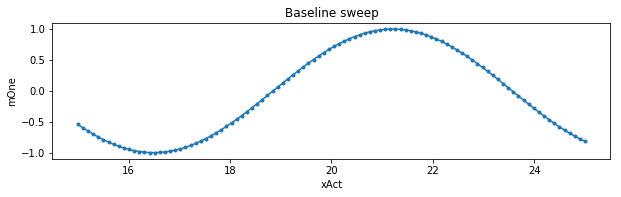

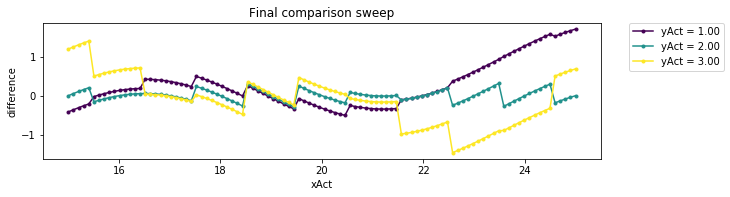

In [10]:
p = Plant()

# First do a 1d sweep
swpA = sUtil.NdSweeper()
swpA.addActuation('xAct', lambda x: p.actuateX(x, rounded=False), np.linspace(15, 25, 100))
swpA.addMeasurement('mOne', lambda: p.measure()[0])
swpA.setMonitorOptions(stdoutPrint=False)
swpA.gather()
swpA.plot()
plt.title('Baseline sweep')

# Get its data
baseline = swpA.data['mOne']

# do a 2d sweep where each line is compared to the 1d line
swpB = swpA.copy()
swpB.reinitActuation()
# The order of these calls matters
swpB.addActuation('xAct', lambda x: p.actuateX(x, rounded=True), np.linspace(15, 25, 100))
swpB.addStaticData('baseline', baseline) 
swpB.addActuation('yAct', lambda y: p.actuateY(y), np.linspace(1, 3, 3))
swpB.addParser('difference', lambda d: d['mOne'] - d['baseline'])
swpB.setPlotOptions(xKey='xAct', yKey='difference')
swpB.gather()
swpB.plot()
plt.title('Final comparison sweep')